In [ ]:
#play()

Welcome to Blackjack!

Instructions: 
    
    Click anywhere here in this text , then Cell -- > Run all Bellow
    
    Finally click on play() above and press Ctrl+Enter
    

In [312]:
import random
import ipywidgets as widgets
from IPython import display
import time
import pdb
from PIL import Image

In [313]:
# values to use lates to build the shoe

suits = ('Hearts', 'Diamonds', 'Spades', 'Clubs')
ranks = ('Ace','Two','Three','Four','Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten', 'Jack', 'Queen', 'King')
values = {'Two':2, 'Three':3, 'Four':4, 'Five':5, 'Six':6, 'Seven':7, 'Eight':8,'Nine':9, 'Ten':10, 'Jack':10, 
         'Queen':10, 'King':10, 'Ace':11}

In [314]:
class Card:
    
    def __init__(self, suit, rank):
        # creates the card, with its value in self.value
        self.suit = suit
        self.rank = rank
        self.value = values[rank]
    
    def __str__(self):
        # creates a print to show the player via text
        return self.rank + ' of ' + self.suit

In [315]:
# open the image off all cards and makes the cuts for each card

cards_deck = Image.open('Images/card_deck.png')
h,w = cards_deck.size
x = h/13
y = w/5

# makes every horizontal line of cards 

list_clubs = []
b = 1

for a in range(0,13):
    list_clubs.append(cards_deck.crop((a*x,0*y,b*x,1*y)))
    b += 1
    
list_diamonds = []
b = 1

for a in range(0,13):
    list_diamonds.append(cards_deck.crop((a*x,1*y,b*x,2*y)))
    b += 1
    
list_hearts = []
b = 1

for a in range(0,13):
    list_hearts.append(cards_deck.crop((a*x,2*y,b*x,3*y)))
    b += 1

list_spades = []
b = 1

for a in range(0,13):
    list_spades.append(cards_deck.crop((a*x,3*y,b*x,4*y)))
    b += 1
    
# puts all cards in one list, in the order we have orginally and the resizes each card
    
cards_list_big = []
cards_list_big.extend(list_hearts)
cards_list_big.extend(list_diamonds)
cards_list_big.extend(list_spades)
cards_list_big.extend(list_clubs)

cards_list = []
for i in range(0,52):
    card = cards_list_big[i].resize((65,100))
    cards_list.append(card)
    
# makes the hole card ad resizes it

hole_card_big = cards_deck.crop((2*x,4*y,3*x,5*y))
hole_card = hole_card_big.resize((65,100))


# creates a dictionary with keys being the strings of the card and keys the image object

cards_list_str = []
for suit in suits:
    for rank in ranks:
        card_str = Card(suit, rank).__str__()
        cards_list_str.append(card_str)

cards_dict = {}

i = 0
for card_str in cards_list_str:
    cards_dict[card_str] = cards_list[i]
    i += 1

In [316]:
class Shoe:
    global count
    
    def __init__(self):
        # creates class shoe with 4 decks 
        self.shoe = []
        i = 1
        while i <= 4:
            for suit in suits:
                for rank in ranks:
                    card = Card(suit, rank)
                    self.shoe.append(card)
            i += 1
    
    def __str__(self):
        # just to check if shoe created correctly
        shoe_comp = ''
        for card in self.shoe:
            shoe_comp += '\n' + card.__str__()
        return 'The shoe has:' + shoe_comp
    
    def shuffle(self):
        # randomly shuffles the shoe
        random.shuffle(self.shoe)
        
    def deal(self):
        global count
        # takes one card from the shoe
        # updates count
        
        dealed_card = self.shoe.pop()
        
        count.count_update(dealed_card)
        
        return dealed_card
    
    def shoelist(self):
        # to check the list and how many cards are in the shoe
        return self.shoe

In [317]:
class Hand:
    def __init__(self):
        # creates hand, with value and keep track of aces for 1 or 11 value and for 'soft' or 'hand' value
        self.cards = []  
        self.value = 0   
        self.aces = 0    
    
    def add_card(self,card):
        # when card taken, add a card and the value. If card is ace, adds one ace to self.aces
        self.cards.append(card)
        self.value += card.value
        if card.rank == 'Ace':
            self.aces += 1
    
    def adjust_for_ace(self):
        # adjusts the value of one ace to 1 if total is more than 21 and takes one ace out from tracking
        while self.value > 21 and self.aces:
            self.value -= 10
            self.aces -= 1

In [318]:
class Chips:
    
    def __init__(self):
        # creates the chips. By default, player starts with 100 but that could be changed in future recoding
        self.total = 100
        self.bet = 0
        
    def win_bet(self):
        # in case of wining, chips are increased by 1/1 gain/bet 
        self.total += self.bet
    
    def lose_bet(self):
        # in case of losing, chips are decreased by 1/1 loss/bet
        self.total -= self.bet
        
    def blackjack_bet(self):
        # in case of winning with blackjack, chips are increased by 3/2 gain/bet
        self.total = int(self.total*1.5)

In [319]:
class Count:
    # creates the count, adds o substracts one to total and prints the total
    
    def __init__(self):
        self.total = 0
        self.onevalue = 0
        
    def count_update(self, card):
        c = card.__str__()
        if 'Two' in c or 'Three' in c or 'Four' in c or 'Five' in c or 'Six' in c:
            self.total += 1
        elif 'Ten' in c or 'Jack' in c or 'Queen' in c or 'King' in c or 'Ace' in c:
            self.total -= 1
        
    def __str__(self):
        return 'Count : '+ str(self.total)
        
    def count_value(self, card):
        c = card.__str__()
        if 'Two' in c or 'Three' in c or 'Four' in c or 'Five' in c or 'Six' in c:
            self.onevalue = 1
        elif 'Ten' in c or 'Jack' in c or 'Queen' in c or 'King' in c or 'Ace' in c:
            self.onevalue = -1


In [320]:
def initialize_game():
    global shoe, player, dealer, slidera, buttonc, ft, count
    # ft means first time, in that case, creates a new shoe
    betcount = count.total
    if ft:
        shoe = Shoe()
        shoe.shuffle()
    # also, if 25% or less remaining cards in the show, creates a new shoe and of course, a new count
    elif len(shoe.shoelist()) <= 52:
        shoe = Shoe()
        shoe.shuffle()
        count = Count()
        print('Shoe has been shuffled')
    
    #creates new hands for player, dealer, takes two card for each and adjust for aces
    player = Hand()
    dealer = Hand()
    player.add_card(shoe.deal())
    player.add_card(shoe.deal())
    player.adjust_for_ace()
    dealer.add_card(shoe.deal())
    dealer.add_card(shoe.deal())
    dealer.adjust_for_ace()
    
    display.clear_output()
    
    # first time welcomes the player, then sets first time to false
    if ft:
        print('Welcome to BlackJack!')
        ft = False
    
    chips_image = Image.open('Images/chips.jpeg')
    display.display(chips_image.resize((300,200)))
    
    
    # creates a slider from 1 to maximum of chips to ask for a bet,then press the button to bet
    print('How much do you want to bet?')
    print(f'You have {chips.total} chips')
    slidera = widgets.IntSlider(value=(chips.total)/3,min=1,max=chips.total)
    buttonc = widgets.Button(description='Make Bet',button_style='info') 
    display.display(slidera)
    display.display(buttonc)
    print('\n')
    print(f'Count : {betcount}')
    buttonc.on_click(on_button_clicked_c)
    

In [321]:
def take_bet():
    global slidera, buttonc, bet, player, dealer
    #closes the slider, prints the value being bet and starts the player rounds
    chips.bet = slidera.value
    slidera.close()
    buttonc.close()
    display.clear_output()
    print(f'You are betting {slidera.value} chips')
    player_rounds()
    


In [322]:
def show_some(player,dealer):
    #creates a list to print the cards in hand and adds 'soft' or 'hard' before the value if needed
    global insurance_card, cards_dict, count, holecard
    
    listplayer = []
    for i in player.cards:
        listplayer.append(i)
    print('\nYou have the following cards:')
    #for i in listplayer:
    #    print(i)
    
    # creates a new image long as needed, and the pastes every card next to each other
    l = len(listplayer)
    new_im = Image.new('RGB', (65*l,100))
    
    i = 0
    for item in listplayer:
        new_im.paste(cards_dict[item.__str__()],(65*i,0))
        i += 1
        
    display.display(new_im)
    
    
    # find if soft or hard
    if 12 <= player.value <= 20 and player.aces == 1:
        print(f"Value = 'Soft' {player.value}")
        print('Chance to bust: 0 %')
    elif 12 <= player.value <= 20 and player.aces == 0:
        print(f"Value = 'Hard' {player.value}")
        print('\n')
        print('Chance to bust: ' + str(chance_busting(player, shoe))+ ' %')
    else:
        print(f"Value = {player.value}")
        print('Chance to bust: 0%')
    
    
    # same for the dealer but no need of 'soft' or 'hard'. Instead, shows first card as hole card 
    listdealer = []
    for i in dealer.cards:
        listdealer.append(i)
    print('\n\nDealer has the following cards:')
    
    new_im = Image.new('RGB', (65*2,100))
    
    new_im.paste(hole_card,(0,0))
    new_im.paste(cards_dict[listdealer[1].__str__()],(65,0))
        
    display.display(new_im)
    
    
    #print('Hole card')
    
    holecard = listdealer[0]
    insurance_card = listdealer[1]
    holevalue = listdealer[1].value
    print(f'Value = X + {holevalue}')
    print('\n')
    
    # prints current count value adjustin for the holecard
    if len(listplayer) == 2:
        count.count_value(holecard)
        count.total = count.total - count.onevalue
    print(count)
    print('\n')

In [323]:
def show_all(player,dealer):
    global insurance_card, count, holecard
    
    # to use when round ends, just a list of cards in both hands
    listplayer = []
    for i in player.cards:
        listplayer.append(i)
    print('\nYou have the following cards:')
    
    # creates a new image long as needed, and the pastes every card next to each other
    l = len(listplayer)
    new_im = Image.new('RGB', (65*l,100))
    
    i = 0
    for item in listplayer:
        new_im.paste(cards_dict[item.__str__()],(65*i,0))
        i += 1
        
    display.display(new_im)
    print(f"Value = {player.value}")
    
    
    listdealer = []
    for i in dealer.cards:
        listdealer.append(i)
    print('\nDealer has the following cards:')
    
    # creates a new image long as needed, and the pastes every card next to each other
    l = len(listdealer)
    new_im = Image.new('RGB', (65*l,100))
    
    i = 0
    for item in listdealer:
        new_im.paste(cards_dict[item.__str__()],(65*i,0))
        i += 1
        
    display.display(new_im)
    print(f"Value = {dealer.value}")
    print('\n')
    
    # prints count value, adjusting again for shown holecard
    count.total = count.total + count.onevalue
    print(count)
    print('\n')

In [324]:
def player_rounds():
    global player, shoe, dealer
    
    # checks every time for different scenarios: blackjack, bust, 21. If not one of them, asks player next move
    if player.value == 21 and len(player.cards) == 2 and dealer.value != 21:
        display.clear_output()
        blackjack_win(player, chips)
    elif player.value < 21:
        hit_or_stand()
    elif player.value > 21:
        display.clear_output()
        player_busts(player, chips)
    elif player.value == 21 and len(player.cards) != 2:
        display.clear_output()
        dealer_rounds()
    

In [325]:
def dealer_rounds():
    global player, shoe, dealer, chips, bet
    
    # dealer takes cards until value reaches 17 or more, then stops. In case of 'soft' 17, also hits
    while dealer.value <= 17:
        if dealer.value < 17:
            hit(shoe, dealer)
        elif dealer.value == 17 and dealer.aces >= 1:
            hit(shoe, dealer)
        else:
            break
    
    
        
    # checks different ending scenarios: win, bust, lost, push
    if player.value > dealer.value:
        display.clear_output()
        player_wins(player,dealer,chips)
    elif dealer.value > player.value and dealer.value < 21:
        display.clear_output()
        dealer_wins(player, dealer, chips)
    elif dealer.value > 21:
        display.clear_output()
        dealer_busts(player, dealer, chips)
    elif player.value == dealer.value:
        display.clear_output()
        push(player, dealer)
    elif dealer.value == 21:
        display.clear_output()
        dealer_wins(player, dealer, chips)

In [326]:
def hit_or_stand():
    global buttond,buttone, player, dealer, buttonh, buttonj, buttonm, buttonp, insurance_card
    
    #checks if there are enough chips to split or double down
    enough_chips = (chips.total - chips.bet) >= chips.bet
    
    
    # with buttons, asks the player next move. Hit or stand
    show_some(player, dealer)
    buttond = widgets.Button(description='Hit',button_style='info')
    buttone = widgets.Button(description='Stand',button_style='info')
    display.display(buttond)
    display.display(buttone)
    buttond.on_click(on_button_clicked_d)
    buttone.on_click(on_button_clicked_e)
    
    #checks if there are enough chips to split or double down
    enough_chips = (chips.total - chips.bet) >= chips.bet
    
    
    # if enough chips are available, option to double down
    if enough_chips:
        buttonh = widgets.Button(description='Double Down',button_style='info')
        display.display(buttonh)
        buttonh.on_click(on_button_clicked_h)

    
    # if first round is a pair of anything but aces, it shows the button to split
    if len(player.cards) == 2 and player.aces == 0 and (player.cards)[0].value == (player.cards[1]).value and enough_chips:
        buttonj = widgets.Button(description='Split',button_style='info')
        display.display(buttonj)
        buttonj.on_click(on_button_clicked_j)
        
    # if first round, option to surrender
    if len(player.cards) == 2:
        buttonm = widgets.Button(description='Surrender',button_style='info')
        display.display(buttonm)
        buttonm.on_click(on_button_clicked_m)
        
    # if dealer is showing and ace, gives the option to bet that dealer has a blackjack, pays 2:1
    if len(player.cards) == 2 and 'Ace' in insurance_card.__str__():
        buttonp = widgets.Button(description='Insurance',button_style='info')
        display.display(buttonp)
        buttonp.on_click(on_button_clicked_p)
        
        

In [327]:
def hit(shoe,hand):
    
    # takes a card from the shoe and adds it to the selected hand
    
    hitcard = shoe.deal()
    hand.add_card(hitcard)
    hand.adjust_for_ace()
    

In [328]:
def double_down_hit():
    global buttoni, chips
    
    # doubles the bet and shows button to hit
    chips.bet = (chips.bet)*2
    print(f'Bet has been doubled. Now betting {chips.bet} chips')
    show_some(player, dealer)
    buttoni = widgets.Button(description='Hit',button_style='info')
    display.display(buttoni)
    buttoni.on_click(on_button_clicked_i)
    
    
    

In [329]:
def double_down_stand(shoe, player):
    global dealer, chips, buttone
    
    # cheks for bust and if not, shows stand button
    if player.value > 21:
        display.clear_output()
        player_busts(player, chips)
    
    elif player.value == 21:
        display.clear_output()
        dealer_rounds()
    
    elif player.value < 21:
        display.clear_output()
        show_some(player,dealer)
        buttone = widgets.Button(description='Stand',button_style='info')
        display.display(buttone)
        buttone.on_click(on_button_clicked_e)
    

In [330]:
def player_wins(player, dealer, chips):
    
    # prints that playes has won and adds bet to the player's chips. Then asks to play again or not
    if player.value == 21:
        print('You win!')
        chips.win_bet()
        print(f'You have now {chips.total} chips')
        show_all(player,dealer)
        ask_for_playagain()
    
    elif player.value > dealer.value and player.value < 21:
        print("You win!")
        chips.win_bet()
        print(f'You have now {chips.total} chips')
        show_all(player,dealer)
        ask_for_playagain()

In [331]:
def blackjack_win(player, chips):
    
    # prints blackjack win and adds the special bet price to player's chips. Then asks to play again or not
    print('Blackjack! You win 3/2')
    print(f'You have now {chips.total} chips')
    chips.blackjack_bet()
    show_all(player,dealer)
    ask_for_playagain()

In [332]:
def player_busts(player,chips):
    
    # prints that player has lost and remove the bet from player's chips. Then asks to play again or not
    print("You lose. Dealer wins")
    chips.lose_bet()
    print(f'You have  now {chips.total} chips')
    show_all(player,dealer)
    ask_for_playagain()

In [333]:
def dealer_wins(player, dealer, chips):
    
    # prints that dealer won and adjust the player's chips. Then asks to play again or not
    if dealer.value == 21:
        print("Dealer wins. Dealer's cards value is exactly 21")
        chips.lose_bet()
        print(f'You have now {chips.total} chips')
        show_all(player,dealer)
        ask_for_playagain()
    
    elif dealer.value > player.value and dealer.value < 21:
        print(f"You lose")
        chips.lose_bet()
        print(f'You have now {chips.total} chips')
        show_all(player,dealer)
        ask_for_playagain()

In [334]:
def dealer_busts(player, dealer, chips):
    
    # prints that dealer busted and adjusts the chips. Then asks to play again or not
    print("You win!")
    chips.win_bet()
    print(f'You have now {chips.total} chips')
    show_all(player,dealer)
    ask_for_playagain()

In [335]:
def push(player, dealer):
    
    # prints player and dealer tied and then asks to play again or not
    print('Push! Bet is returned')
    print(f'You have {chips.total} chips')
    show_all(player,dealer)
    ask_for_playagain()

In [336]:
def ask_for_playagain():
    global buttonf, buttong
    
    # if no more chips, game is over, else, asks the player to play again or not
    if chips.total == 0:
        loser = Image.open('Images/loser.jpeg')
        display.display(loser.resize((300,200)))
        print('GAME OVER. You ran out of chips. Thanks for playing')
    else:
        print('\nPlay again?')
        buttonf = widgets.Button( description='Yes', button_style='info')
        buttong = widgets.Button( description='No', button_style='info')
        display.display(buttonf)
        display.display(buttong)
        buttonf.on_click(on_button_clicked_f)
        buttong.on_click(on_button_clicked_g)

In [337]:
def player_rounds_main():
    global player, shoe, dealer
    
    if player.value >= 21:
        display.clear_output()
        player_rounds_secondary()
    elif player.value < 21:
        hit_or_stand_player()
   

In [338]:
def player_rounds_secondary():
    global player, secondaryplayer, shoe, dealer
    
    if secondaryplayer.value == 21:
        display.clear_output()
        dealer_rounds_split()
    elif secondaryplayer.value > 21:
        display.clear_output()
        dealer_rounds_split()
    elif secondaryplayer.value < 21:
        display.clear_output()
        hit_or_stand_secondaryplayer()

In [339]:
def dealer_rounds_split():
    global dealer, shoe
    
    # dealer takes cards until value reaches 17 or more, then stops
    while dealer.value < 17 :
        hit(shoe, dealer)
    show_all_split()
    checks_endround_split()

In [340]:
def hit_or_stand_player():
    global buttonk, buttonl, buttonm
    
    # with buttons, asks the main player next move. Hit, stand or double down
    show_some_split()
    print('PLAYING MAIN HAND')
    buttonk = widgets.Button(description='Hit',button_style='info')
    buttonl = widgets.Button(description='Stand',button_style='info')
    display.display(buttonk)
    display.display(buttonl)
    buttonk.on_click(on_button_clicked_k)
    buttonl.on_click(on_button_clicked_l)

In [341]:
def hit_or_stand_secondaryplayer():
    global buttonn, buttono, buttonp
    
    #with buttons, asks the split player next move. Hit, stand or double down
    show_some_split()
    print('PLAYING SPLIT HAND')
    buttonn = widgets.Button(description='Hit',button_style='info')
    buttono = widgets.Button(description='Stand',button_style='info')
    display.display(buttonn)
    display.display(buttono)
    buttonn.on_click(on_button_clicked_n)
    buttono.on_click(on_button_clicked_o)

In [342]:
def show_some_split():
    global player, secondaryplayer, dealer
    
    #creates a list to print the cards in hand and adds 'soft' or 'hard' before the value if needed
    listplayer = []
    for i in player.cards:
        listplayer.append(i)
    print('\nYour main hand has the following cards:\n')
    
    # creates a new image long as needed, and the pastes every card next to each other
    l = len(listplayer)
    new_im = Image.new('RGB', (65*l,100))
    
    i = 0
    for item in listplayer:
        new_im.paste(cards_dict[item.__str__()],(65*i,0))
        i += 1
        
    display.display(new_im)
    
    # find if soft or hard
    if 12 <= player.value <= 20 and player.aces == 1:
        print(f"Value = 'Soft' {player.value}")
        print('Chance to bust : 0 %')
    elif 12 <= player.value <= 20 and player.aces == 0:
        print(f"Value = 'Hard' {player.value}")
        print('\n')
        print('Chance to bust: ' + str(chance_busting(player, shoe))+ ' %')
    else:
        print(f"Value = {player.value}")
        print('Chance to bust : 0 %')
    
    
    #repeat process to show secondary hand( split hand)
    listsecondaryplayer = []
    for i in secondaryplayer.cards:
        listsecondaryplayer.append(i)
    print('\nYour split hand has the following cards:\n')
    
    # creates a new image long as needed, and the pastes every card next to each other
    l = len(listsecondaryplayer)
    new_im = Image.new('RGB', (65*l,100))
    
    i = 0
    for item in listsecondaryplayer:
        new_im.paste(cards_dict[item.__str__()],(65*i,0))
        i += 1
        
    display.display(new_im)
    
    if 12 <= secondaryplayer.value <= 20 and secondaryplayer.aces == 1:
        print(f"Value = 'Soft' {secondaryplayer.value}")
        print('Chance to bust: 0 %')
    elif 12 <= secondaryplayer.value <= 20 and secondaryplayer.aces == 0:
        print (f"Value = 'Hard' {secondaryplayer.value}")
        print('\n')
        print('Chance to bust: ' + str(chance_busting(secondaryplayer, shoe))+ ' %')
    else:
        print(f"Value = {secondaryplayer.value}")
    
    
    # same for the dealer but no need of 'soft' or 'hard'. Instead, keeps one of the cards hidden 
    listdealer = []
    for i in dealer.cards:
        listdealer.append(i)
    print('\n\nDealer has the following cards:\n')
    new_im = Image.new('RGB', (65*2,100))
    
    new_im.paste(hole_card,(0,0))
    new_im.paste(cards_dict[listdealer[1].__str__()],(65,0))
        
    display.display(new_im)
    

    holevalue = listdealer[1].value
    print(f'Value = X + {holevalue}')
    print('\n')
    print('\n')
    
    # prints current count value adjustin for the holecard
    if len(listplayer) == 2:
        count.count_value(holecard)
        count.total = count.total - count.onevalue
    print(count)
    print('\n')

In [343]:
def show_all_split():
    global player, secondaryplayer, dealer
    
    #creates a list to print the cards in hand and adds 'soft' or 'hard' before the value if needed
    listplayer = []
    for i in player.cards:
        listplayer.append(i)
    print('\nYour main hand has the following cards:\n')
    
    # creates a new image long as needed, and the pastes every card next to each other
    l = len(listplayer)
    new_im = Image.new('RGB', (65*l,100))
    
    i = 0
    for item in listplayer:
        new_im.paste(cards_dict[item.__str__()],(65*i,0))
        i += 1
        
    display.display(new_im)
    
    # find if soft or hard
    if 12 <= player.value <= 20 and player.aces == 1:
        print(f"Value = 'Soft' {player.value}")
    elif 12 <= player.value <= 20 and player.aces == 0:
        print(f"Value = 'Hard' {player.value}")
    else:
        print(f"Value = {player.value}")
    
    
    #repeat process to show secondary hand( split hand)
    listsecondaryplayer = []
    for i in secondaryplayer.cards:
        listsecondaryplayer.append(i)
    print('\nYour split hand has the following cards:\n')
    
    # creates a new image long as needed, and the pastes every card next to each other
    l = len(listsecondaryplayer)
    new_im = Image.new('RGB', (65*l,100))
    
    i = 0
    for item in listsecondaryplayer:
        new_im.paste(cards_dict[item.__str__()],(65*i,0))
        i += 1
        
    display.display(new_im)
    
    if 12 <= secondaryplayer.value <= 20 and secondaryplayer.aces == 1:
        print(f"Value = 'Soft' {secondaryplayer.value}")
    elif 12 <= secondaryplayer.value <= 20 and secondaryplayer.aces == 0:
        print (f"Value = 'Hard' {secondaryplayer.value}")
    else:
        print(f"Value = {secondaryplayer.value}")
    
    
    # same for the dealer but no need of 'soft' or 'hard'. 
    listdealer = []
    for i in dealer.cards:
        listdealer.append(i)
    print('\n\nDealer has the following cards:\n')
    
    # creates a new image long as needed, and the pastes every card next to each other
    l = len(listdealer)
    new_im = Image.new('RGB', (65*l,100))
    
    i = 0
    for item in listdealer:
        new_im.paste(cards_dict[item.__str__()],(65*i,0))
        i += 1
        
    display.display(new_im)
    
    print(f'Value = {dealer.value}')
    print('\n\n')
    
    # prints count value, adjusting again for shown holecard
    count.total = count.total + count.onevalue
    print(count)
    print('\n')

In [344]:
def checks_endround_split():
    global chips, player, secondaryplayer, dealer
    
    # every check for multiple results with split. all in one function with print included
    # added else for any no included result. nothing will happen and asks the player to play again
    display.clear_output()
    
    print('')
    
    if dealer.value < player.value <= 21 and dealer.value < secondaryplayer.value <= 21:
        print('Both hands win')
        chips.total = chips.total + chips.bet*2
        
    elif dealer.value < player.value <= 21 and secondaryplayer.value > 21:
        print('Main hand wins. Split hand busted')
        
    
    elif dealer.value < secondaryplayer.value <= 21 and player.value > 21:
        print('Split hand wins. Main hand busted')
    
    
    elif player.value > 21 and secondaryplayer.value > 21:
        print('Both hands busted')
        chips.total = chips.total - chips.bet*2
    
    
    elif player.value == secondaryplayer.value == dealer.value <= 21:
        print('Both hands push with dealer')
        
    
    elif dealer.value < player.value <= 21 and dealer.value == secondaryplayer.value:
        print('Main hands wins. Split hand pushes with dealer')
        chips.total = chips.total + chips.bet
        
    
    elif dealer.value < secondaryplayer.value <= 21 and dealer.value == player.value:
        print('Split hand wins. Main hand pushes with dealer')
        chips.total = chips.total + chips.bet
    
    
    elif secondaryplayer.value < player.value == dealer.value <= 21:
        print('Main hand pushes with dealer. Secondary hand loses')
        chips.total = chips.total - chips.bet
        
    
    elif player.value < secondaryplayer.value == dealer.value <= 21:
        print('Secondary hand pushes with dealer. Main hand loses')
        chips.total = chips.total - chips.bet
        
    
    elif player.value == dealer.value <= 21 and secondaryplayer.value > 21:
        print('Main hand pushes with dealer. Split hand busted')
        chips.total = chips.total - chips.bet
        
    
    elif secondaryplayer.value == dealer.value <= 21 and player.value > 21:
        print('Split hand pushes with dealer. Main hand busted')
        chips.total = chips.total - chips.bet
        
    
    elif player.value < dealer.value <= 21 and  secondaryplayer.value < dealer.value <= 21:
        print('Both hands lose. Dealer wins')
        chips.total = chips.total - chips.bet*2
        
    
    elif secondaryplayer.value < dealer.value < player.value <= 21:
        print('Main hand wins. Split hand loses')
        
    
    elif player.value < dealer.value < secondaryplayer.value <= 21:
        print('Split hand wins. Main hand loses')
    
    
    elif player.value <= 21 and secondaryplayer.value > 21 and dealer.value > 21:
        print('Main hand wins. Split hand and dealer busted')
        
    
    elif secondaryplayer.value <= 21 and player.value > 21 and dealer.value > 21:
        print('Split hand wins. Main hand and dealer busted')
        
    
    elif player.value <= 21 and secondaryplayer.value <= 21 and dealer.value > 21:
        print('Both hands win. Dealer busted')
        chips.total = chips.total + chips.bet*2
    
    
    elif secondaryplayer.value > 21 and player.value < dealer.value <= 21:
        print('Main hand loses. Split hand busted')
        chips.total = chips.total - chips.bet*2
    
    
    elif player.value > 21 and secondaryplayer.value < dealer.value <= 21:
        print('Main hand busted. Split hand loses')
        chips.total = chips.total - chips.bet*2
    
    
    else:
        print('End not recognized. Sorry for the incovenience. Nothing will happen')
        
    
    
    print(f'\nYou have {chips.total} chips')
    show_all_split()
    ask_for_playagain()
        
        
    

In [345]:
def on_button_clicked_a(b):
    # button a for starting the game
    buttona.close()
    buttonb.close()
    initialize_game()

In [346]:
def on_button_clicked_b(b):
    # button b to quit playing
    print('Thanks for playing!')
    buttona.close()
    buttonb.close()

In [347]:
def on_button_clicked_c(b):
    # button c to place the bet showing in the slider at the moment of clicking
    slidera.close()
    buttonc.close()
    take_bet()

In [348]:
def on_button_clicked_d(b):
    global shoe, player
    # button d to hit
    hit(shoe,player)
    buttond.close()
    buttone.close()
    display.clear_output()
    player_rounds()
    

In [349]:
def on_button_clicked_e(b):
    # button e to stand
    buttond.close()
    buttone.close()
    display.clear_output()
    dealer_rounds()
    
    

In [350]:
def on_button_clicked_f(b):
    # button f to play again next round
    buttonf.close()
    buttong.close()
    display.clear_output()
    initialize_game()
    

In [351]:
def on_button_clicked_g(b):
    # button g to quit playing after being played at least one round
    buttonf.close()
    buttong.close()
    display.clear_output()
    print(f'Thanks for playing. You leave with {chips.total} chips.')

In [352]:
def on_button_clicked_h(b):
    # button h to double down
    buttond.close()
    buttone.close()
    buttonh.close()
    display.clear_output()
    double_down_hit()

In [353]:
def on_button_clicked_i(b):
    # button i to hit in case of double down
    buttoni.close()
    display.clear_output()
    hit(shoe, player)
    double_down_stand(shoe,player)

In [354]:
def on_button_clicked_j(b):
    global secondaryplayer, secondarybet
    #button j creates splithand and draws two cards adjusting for aces, crates splitbet and starts the splitgame
    buttonj.close()
    display.clear_output()
    secondaryplayer = Hand()
    secondarybet = chips.bet
    secondaryplayer.add_card(shoe.deal())
    secondaryplayer.add_card(shoe.deal())
    secondaryplayer.adjust_for_ace()
    player_rounds_main()

In [355]:
def on_button_clicked_k(b):
    global shoe, player
    # button d to hit main hand
    hit(shoe,player)
    display.clear_output()
    player_rounds_main()

In [356]:
def on_button_clicked_l(b):
    # button l to stand in main hand
    display.clear_output()
    player_rounds_secondary()

In [357]:
def on_button_clicked_n(b):
    global shoe, secondaryplayer
    # button n to hit for split hand
    display.clear_output()
    hit(shoe, secondaryplayer)
    player_rounds_secondary()

In [358]:
def on_button_clicked_o(b):
    # button o to stand for split hand, goes to dealer_split
    display.clear_output()
    dealer_rounds_split()

In [359]:
def on_button_clicked_m(b):
    display.clear_output()
    print('Player surrenders. Half of the bet returned')
    chips.total = int(chips.total - chips.bet/2)
    print(f'\nYou have now {chips.total} chips ')
    ask_for_playagain()

In [360]:
def on_button_clicked_p(b):
    display.clear_output()
    if dealer.value == 21:
        chips.total = chips.total + chips.bet*2
        print(f'Dealer has a blackjack! Insurance pays double the bet.\nYou have now {chips.total} chips')
    else:
        chips.total = chips.total - chips.bet
        print(f"Dealer doesn't have a blackjack! Dealer has {dealer.value}. You lose the bet.\nYou have now {chips.total} chips")
    ask_for_playagain()

In [361]:
def on_button_clicked_q(b):
    display.clear_output()
    card_values = Image.open('Images/card_values.png')
    display.display(card_values.resize((300,200)))
    print('')
    print('\nShoe is made with 4 decks. Reshuffles at 25%')
    print('\nDealer hits on a soft 17')
    print('\nDoubledown, Split and Surrender available')
    print('\nInsurance available')
    print('\nSubsplit and Doubledown on split hands unavailable')
    print('\nBlackjack pays 3:2 and Insurance plays 2:1')
    print('\nOnly original bets are lost on dealer blackjack')
    print('')
    print('\nEnjoy!')
    buttonr = widgets.Button(description='Back',button_style='info')
    display.display(buttonr)
    buttonr.on_click(on_button_clicked_r)

In [362]:
def on_button_clicked_r(b):
    display.clear_output()
    start_playing()

In [363]:
def chance_busting(hand, shoe):
    
    twos = 0
    threes = 0
    fours = 0
    fives = 0
    sixes = 0
    sevens = 0
    eights = 0
    nines = 0
    tens = 0
    aces = 0
    
    for card in shoe.shoelist():
        if card.value == 2:
            twos +=1
        elif card.value == 3:
            threes +=1
        elif card.value == 4:
            fours +=1
        elif card.value == 5:
            fives +=1
        elif card.value == 6:
            sixes +=1
        elif card.value == 7:
            sevens +=1
        elif card.value == 8:
            eights +=1
        elif card.value == 9:
            nines +=1
        elif card.value == 10:
            tens +=1
        elif card.value == 11:
            aces += 1
            
    chance_dict = {}
    chance_dict[1] = aces
    chance_dict[2] = twos
    chance_dict[3] = threes
    chance_dict[4] = fours
    chance_dict[5] = fives
    chance_dict[6] = sixes
    chance_dict[7] = sevens
    chance_dict[8] = eights
    chance_dict[9] = nines
    chance_dict[10] = tens
    
    difference = 21 - hand.value
    bustingcards = 0
    no_bustingcards = 0
    
    for item in chance_dict.items():
        if item[0] > difference:
            bustingcards += item[1]
        else:
            no_bustingcards += item[1]
            
    total = bustingcards + no_bustingcards
    
    return round(( bustingcards / total ) * 100,2)
            
    

In [364]:
print(chance_busting(player, shoe))

69.61


In [365]:
def suggested_move():
    pass

In [366]:
def start_playing():
    global buttona, buttonb, audio
    
    # shows the first main buttons and some info
    
    blackjack = Image.open('Images/blackjack_main.jpeg')
    display.display(blackjack.resize((300,200)))
    print('BLACKJACK 0.5  (Now with chance of busting and card counting!)')
    #audio
    buttonq = widgets.Button(description='Rules',button_style='info')
    display.display(buttona)
    display.display(buttonb) 
    display.display(buttonq)
    buttona.on_click(on_button_clicked_a)
    buttonb.on_click(on_button_clicked_b)
    buttonq.on_click(on_button_clicked_q)
    print('')
    print('')
    print('by jaume')
    print('2020')
    #play_audio()

In [367]:
def play():
    global buttona, buttonb, chips, ft, audio, count

    # to play for the first time. Initializes the chips, variable first time and  then starts
    # now also starts the count
    buttona = widgets.Button(description = 'Start playing!', button_style = 'info')
    buttonb = widgets.Button(description = 'Quit', button_style = 'info')
    chips = Chips()
    count = Count()
    ft = True
    start_playing()
    

In [368]:
def play_audio():
    
    # creates an audio object to play during the game
    global audio
    audio = display.Audio('8ball.wav', autoplay=True)
    print('playing audio')
    return audio

In [369]:
#play_audio()

In [370]:
chance_busting(player, shoe)

69.61

In [371]:
print(holecard)

Five of Clubs


In [372]:
# add music

In [373]:
# add count and chance to bust

In [374]:
# add suggested move

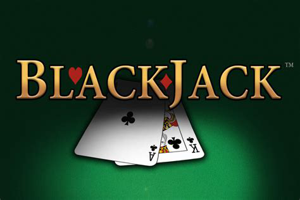

BLACKJACK 0.5  (Now with chance of busting and card counting!)


Button(button_style='info', description='Start playing!', style=ButtonStyle())

Button(button_style='info', description='Quit', style=ButtonStyle())

Button(button_style='info', description='Rules', style=ButtonStyle())



by jaume
2020


In [377]:
play()